<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Genesis Belen Heredia  <br>
Fecha: 17/07/2022

# Importación de librerias necesarias

In [16]:
#Para esta actividad se importarán las siguientes librerías:
#Se implementan las librerias para obtener los datos

#Se realiza la importación de la libreria pandas
import pandas as pd

#Se realiza la importación de la libreria sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Se realiza la importación de la libreria statsmodels
import statsmodels.api as smi

#Se realiza la importación de la libreria necesaria para la regresión lineal
from sklearn.linear_model import LinearRegression 

#Se realiza la importación de la libreria que permite realizar la grafica
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Cargar el Dataset

In [17]:
#Código para cargar Dataset
#Se cargan los datos del Dataset mediante la libreria pandas
FishLinear = pd.read_csv("Fish.csv" )

In [20]:
#Se visualizan 10 registros
FishLinear.head(15)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación


LabelEncoder

In [22]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)
encoder = LabelEncoder()

In [24]:
FishLinear["Species"] = encoder.fit_transform(FishLinear["Species"])

In [25]:
FishLinear.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [26]:
#Función que permite describir el dataset
FishLinear.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2.264151,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,1.704249,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,1.000000,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,2.000000,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,3.500000,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,6.000000,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## Descripción de la fuente del Dataset

In [27]:
#Código que responde a la descripción anterior
FishLinear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int32  
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), int32(1)
memory usage: 8.2 KB


***Descripción***

Mediante el uso de la función info podemos deducir que existen 159 registros los cuales representan diferentes caracteristicas de los peces con mejores pesos. El dataset cuenta con 7 campos donde se puede tomar como variable objetivo ***(Weight)*** y como variables de entrada:

***Variables independientes o variables de entrada X***

***Species:*** Especie a la que pertenecen los peces - Variable Categórica. 

***Length1:*** Longitud vertical en cm del pescado - Variable Continua.

***Length2:*** Longitud diagonal en cm del pescado - Variable Continua.

***Length3:*** Longitud de la cruz en cm del pescado - Variable Continua.

***Height:***  Altura del pescado (cm) -  Variable Continua.

***Width:*** Anchura diagonal del pescado (cm) - Variable Continua.




***Variable dependiente o variable objetivo Y***

***Weight:*** Peso de los pescados (gr) - Variable Continua.


## Explique el problema a resolver. 

Se realizará un modelo de predicción para poder realizar una estimación del mejor peso de los peces, para ello se hará uso de un dataset denominado Fish el mismo que cuenta con 159 registros para cada características. La variable objetivo para este modelo es ***Weight*** y las 6 variables independientes o de entrada que permitirán realizar la regresión lineal.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


***Número de instancias en total***


In [29]:
#Realizar un conteo de los registros del dataset
FishLinear.count()

Species    159
Weight     159
Length1    159
Length2    159
Length3    159
Height     159
Width      159
dtype: int64

***Número de atributos de entrada, su significado y tipo***



***Species:*** Especie a la que pertenecen los peces - Variable Categórica. 

***Length1:*** Longitud vertical en cm del pescado - Variable Continua.

***Length2:*** Longitud diagonal en cm del pescado - Variable Continua.

***Length3:*** Longitud de la cruz en cm del pescado - Variable Continua.

***Height:***  Altura del pescado (cm) -  Variable Continua.

***Width:*** Anchura diagonal del pescado (cm) - Variable Continua.

***Estadísticas de la variable objetivo***

<AxesSubplot:>

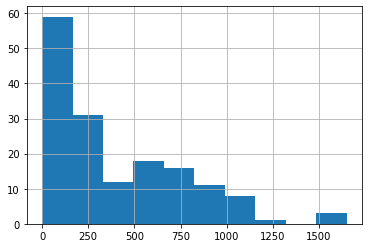

In [30]:
#Trazo de linea habilitado
%matplotlib inline
#Creación de gráfico en base a la variable objetivo
FishLinear['Weight'].hist()

Mediante la gráfica implementada podemos deducir que, la variable objetivo (Weight) es efectiva y esto se debe a la curva que forma su gráfica. Siendo posible la aplicación de la regresión lineal para este modelo.

#### Visualización la distribución de todas las variables de entrada categóricas mediante diagramas de barras

In [31]:
# Encontramos los valores unicos para identificar aquellos que son categoricos y los que son continuos
FishLinear.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

## División del dataset en datos de entrenamiento y datos de test 

In [5]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.


## Regresión Lineal

In [6]:
#Códo del modelo

In [7]:
#Entrenamiento

In [8]:
#Test

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 